<a href="https://colab.research.google.com/github/f-bndk/test_completed/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [ ]:
#подключение google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#загрузка xlsx файла
df = pd.read_excel('/content/drive/MyDrive/data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


In [ ]:
#удаление пустого столбца
df.dropna(how = 'all', axis='columns', inplace=True)
#индекс начинается с 1
df.index = np.arange(1, len(df) + 1)
#создание столбца из индекса
df['id'] = df.index
#создание копии столбца (status) с другим лейблом (month)
df['month'] = df.loc[:, 'status']
#изменение порядка столбцов
df = df[['id','client_id','sum','status','month','sale','new/current','document', 'receiving_date']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              730 non-null    int64  
 1   client_id       724 non-null    float64
 2   sum             724 non-null    float64
 3   status          730 non-null    object 
 4   month           730 non-null    object 
 5   sale            724 non-null    object 
 6   new/current     724 non-null    object 
 7   document        709 non-null    object 
 8   receiving_date  607 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 57.0+ KB


In [ ]:
#замена значение в столбце month
df.loc[df['id'].between(2, 129), 'month'] = '2021-05'
df.loc[df['id'].between(131, 258), 'month'] = '2021-06'
df.loc[df['id'].between(260, 369), 'month'] = '2021-07'
df.loc[df['id'].between(371, 484), 'month'] = '2021-08'
df.loc[df['id'].between(486, 594), 'month'] = '2021-09'
df.loc[df['id'].between(596, 730), 'month'] = '2021-10'

In [ ]:
#замена значение в столбце month
df['month'] = df['month'].replace(['Май 2021', 'Июнь 2021', 'Июль 2021', 'Август 2021', 'Сентябрь 2021', 'Октябрь 2021'], np.nan)

In [ ]:
#конвертация столбца month в datetime
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.strftime('%Y-%m')
#конвертация столбца receiving_date в datetime
df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors="coerce")

In [ ]:
#1 вопрос - общая выручка за июль, только оплаченные сделки
df.loc[(df['month'] == '2021-07') & (df['status'] == 'ОПЛАЧЕНО'), 'sum'].sum()

859896.4699999997

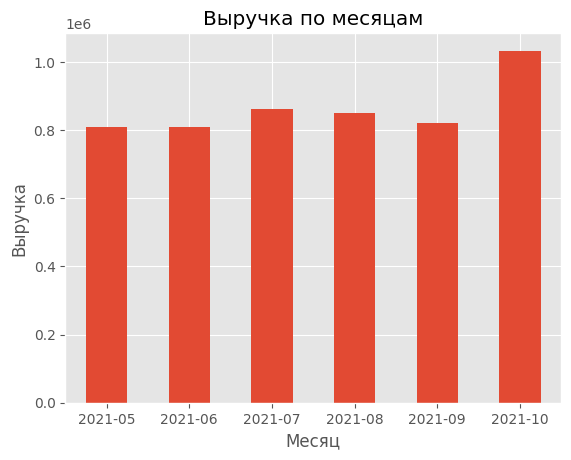

In [ ]:
#2 вопрос - динамика выручки за рассматриваемый период
income_by_month = df.groupby('month')['sum'].sum()
income_by_month.plot(kind='bar', title='Выручка по месяцам', ylabel='Выручка', xlabel='Месяц')
plt.xticks(rotation=0)
plt.show(income_by_month.plot)

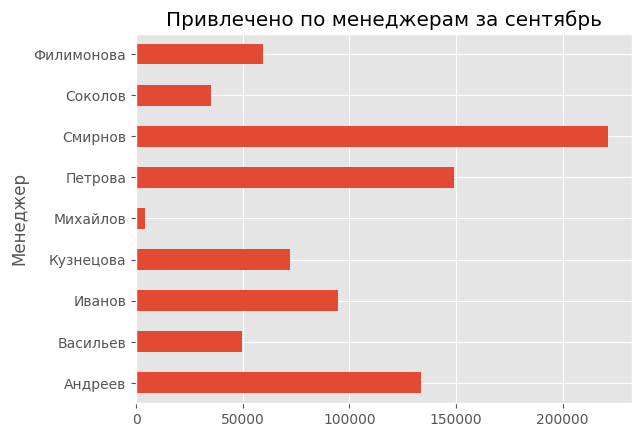

In [ ]:
#3 вопрос - кто из менеджеров привлёк больше всего денежных средств для компании в сентябре
df_september = df.loc[df['month'] == '2021-09']
sales_by_mngr = df_september.groupby('sale')['sum'].sum()
sales_by_mngr.plot(kind='barh', title='Привлечено по менеджерам за сентябрь', ylabel='Менеджер')
plt.show(sales_by_mngr.plot)

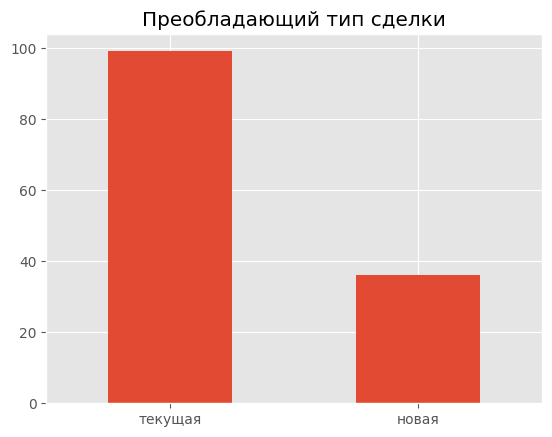

In [ ]:
#4 вопрос - преобладающий тип сделки в октябре
df_october = df.loc[df['month'] == '2021-10']
count_dealtype = df_october['new/current'].value_counts()
count_dealtype.plot(kind='bar', title='Преобладающий тип сделки')
plt.xticks(rotation=0)
plt.show(count_dealtype.plot)

In [ ]:
#5 вопрос - посчитаны оригиналы договоров по майским сделкам полученные в июне
df_may = df.loc[df['month'] == '2021-05']
df_JuneInMay = df_may[df_may['receiving_date'].dt.month == 6]
count_docType = df_JuneInMay['document'].value_counts()
display(count_docType)

оригинал    76
Name: document, dtype: int64

#ЗАДАНИЕ

In [ ]:
#выбор расчетного месяца до июля
MayJune=['2021-05','2021-06']
df_MayJune= (df[df['month'].isin(MayJune)])

In [ ]:
#остаются договоры только позднее июня
df_dropMay = df_MayJune[df_MayJune['receiving_date'].dt.month == 5].index
df_dropJune = df_MayJune[df_MayJune['receiving_date'].dt.month == 6].index
df_MayJune.drop(df_dropMay, inplace=True)
df_MayJune.drop(df_dropJune, inplace=True)

In [ ]:
#фильтр - менеджера Иванов
df_Ivanov = df_MayJune.loc[df_MayJune['sale'] == "Иванов"]

#фильтр для бонусов в 5% и 3%
df_Ivanov_5pct = df_Ivanov.loc[df_Ivanov['sum'] > 10000]
df_Ivanov_3pct = df_Ivanov.loc[df_Ivanov['sum'] < 10000]

#расчет бонусов в 5% и 3%
df_Ivanov_5pct['bonus'] = df_Ivanov_5pct['sum'] * 0.05
df_Ivanov_3pct['bonus'] = df_Ivanov_3pct['sum'] * 0.03

#суммирование 5% бонуса
Ivanov_bonus5pct = df_Ivanov_5pct['bonus'].sum()
#суммирование 3% бонуса
Ivanov_bonus3pct = df_Ivanov_3pct['bonus'].sum()

#окончательный расчет бонуса
BonusIvanov = Ivanov_bonus5pct + Ivanov_bonus3pct

print(BonusIvanov)

5991.451999999999


In [ ]:
#фильтр - менеджер Иванов
df_Petrova = df_MayJune.loc[df_MayJune['sale'] == "Петрова"]

#фильтр для бонуса 7% и расчет
df_Petrova_newDeal = df_Petrova.loc[(df_Petrova['new/current'] == "новая") & (df_Petrova['status'] == "ОПЛАЧЕНО")]
df_Petrova_newDeal['bonus'] = df_Petrova_newDeal['sum'] * 0.07

#суммирование 7% бонуса
Petrova_bonus7pct = df_Petrova_newDeal['bonus'].sum()

#фильтр для бонусов в 5% и 3%
df_Petrova_currentDeal = df_Petrova.loc[df_Petrova['new/current'] == "текущая"]
df_Petrova_5pct = df_Petrova_currentDeal.loc[df_Petrova_currentDeal['sum'] > 10000]
df_Petrova_3pct = df_Petrova_currentDeal.loc[df_Petrova_currentDeal['sum'] < 10000]

#расчет бонусов в 5% и 3%
df_Petrova_5pct['bonus'] = df_Petrova_5pct['sum'] * 0.05
df_Petrova_3pct['bonus'] = df_Petrova_3pct['sum'] * 0.03

#суммирование 5% бонуса
Petrova_bonus5pct = df_Petrova_5pct['bonus'].sum()
#суммирование 3% бонуса
Petrova_bonus3pct = df_Petrova_3pct['bonus'].sum()
#окончательный расчет бонуса
BonusPetrova = Petrova_bonus7pct + Petrova_bonus5pct + Petrova_bonus3pct

print(BonusPetrova)

10871.6584
